# <span style="color:blue"> Projeto 02 - Concessão de cartões de crédito </span>


## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos. 

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio
Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem
O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
  
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
pip install --upgrade scikit-learn

In [35]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree, DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, cross_val_score

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [3]:
# Observe que demo01.csv está na mesma pasta que este notebook
# do contrário, seria necessário indicar a pasta no nome do arquivo
df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


#### Limpeza e Tratamento dos dados
Premeiramente será verificado a ausência de dados na base

In [4]:
nulls = df.isna().sum()
print(nulls)

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64


In [5]:
shape = df.shape[0]
df.drop_duplicates()
shape_pos = df.shape[0]

print(f'Haviam {shape-shape_pos} dados duplicados no DataFrame.')

Haviam 0 dados duplicados no DataFrame.


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Nesta demonstração vamos ver a variável resposta e dois exemplos de univariada apenas.

In [6]:
print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())

mau
False    16260
True       390
Name: count, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


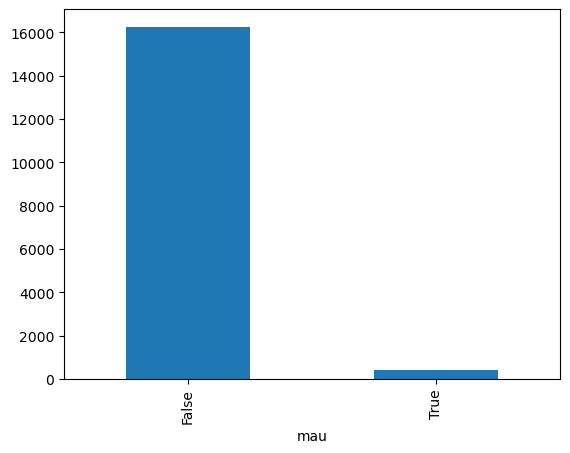

In [7]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

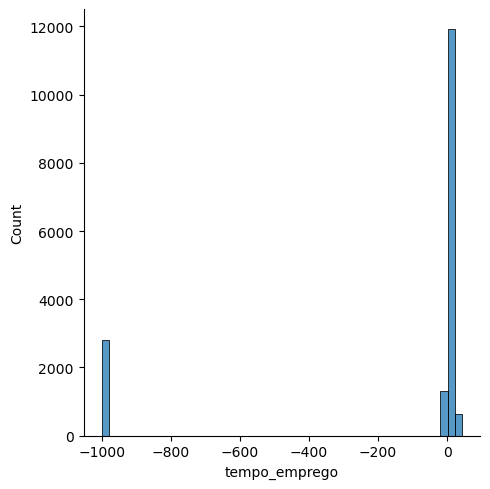

In [8]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)
plt.show()

In [9]:
# Alterando valores de -1000 pra -2, para visualizar melhor no gráfico
var = "tempo_emprego"
df.loc[df[var]<0,var] = -2

C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

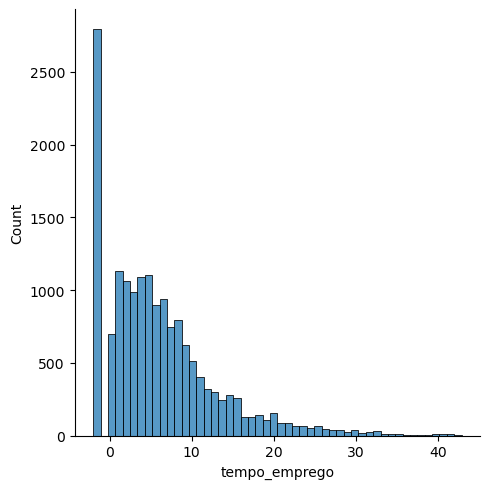

In [10]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)
plt.show()

In [11]:
print(df.columns)

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')


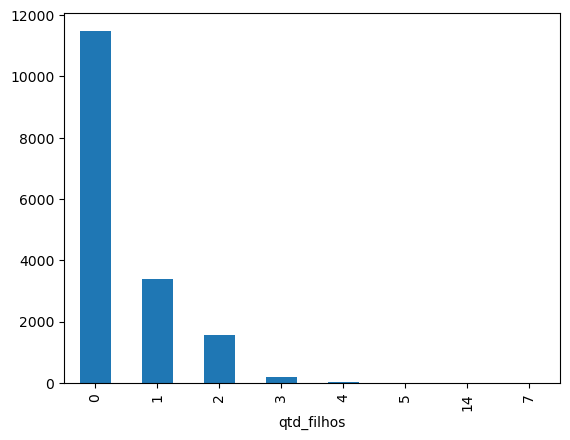

In [12]:
var2 = 'qtd_filhos'
grafico_barras2 = df[var2].value_counts().plot.bar()

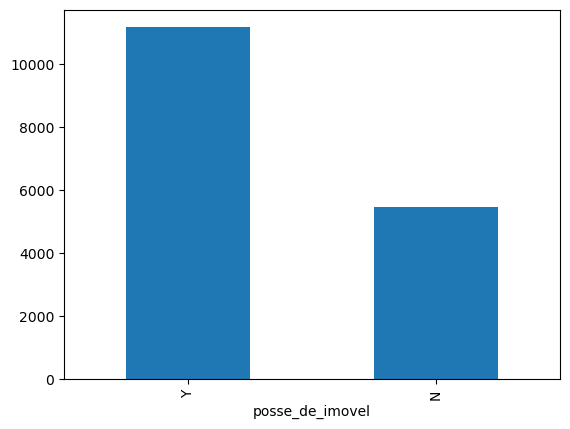

In [13]:
var3 = 'posse_de_imovel'
grafico_barras3 = df[var3].value_counts().plot.bar()

<span>  histograma da variavel ```idade```.  </span>


C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

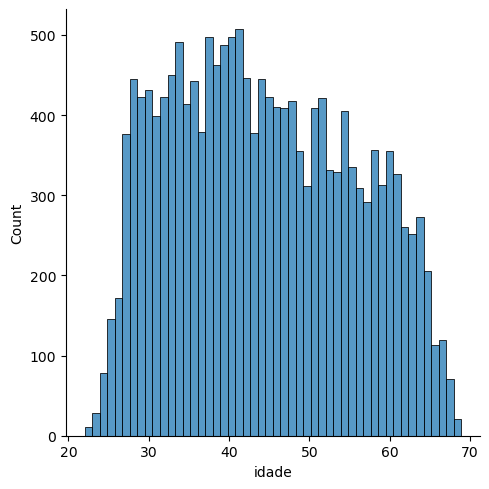

In [14]:
plt.clf()
var_1 = 'idade'

sns.displot(df, x=var_1, bins=50)
plt.show()

### Entendimento dos dados - Bivariadas

Entender a alteração da inadimplência indicada pela variável resposta (```AtrasoRelevante2anos```) e as variáveis explicativas (demais). Para isto, vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.


C:\Users\alima\AppData\Local\Temp\ipykernel_25016\4160224667.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


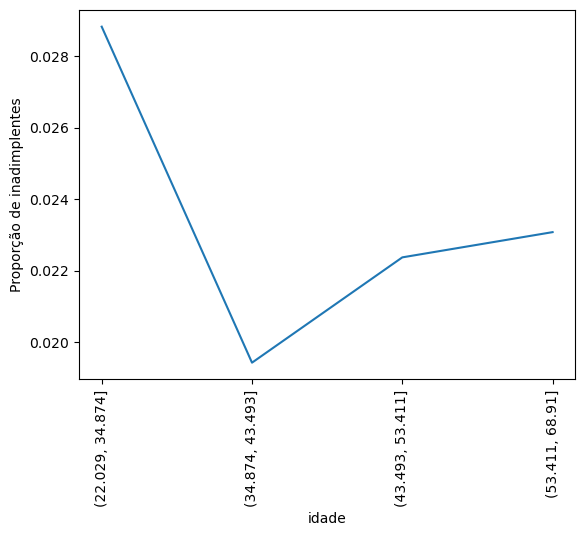

In [15]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

### <span>Bivariada </span>
<span> Análise bivariada para a variável  ```tempo_emprego```.</span>

C:\Users\alima\AppData\Local\Temp\ipykernel_25016\4025404007.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


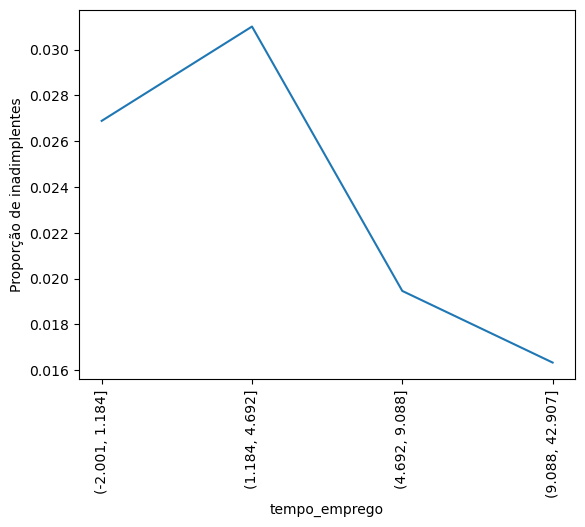

In [16]:
var_2 = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var_2], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation=90)

A partir da visualização dos dois gráficos anteriores nota-se que a maior parte dos inadimplentes tem de 34 à 43 anos e aproximadamente de 1 à 4 anos e meio empregado, a relação observada sugere uma correlação, mas não necessáriamente uma causalidade direta, pois pode haver outros fatores que influenciam tanto no período empregado quanto na inadimplencia , tais como: 

    - Experiência profissional: Pessoas com 1 a 4 anos de emprego geralmente ocupam cargos iniciais com salários mais baixos.
    - Instabilidade: Essa faixa de emprego pode indicar também transições entre trabalhos, o que na maioria das vezes afeta a renda e a  capacidade de do indivíduo.
    - Endividamento: Grande parte da população que se encontra nessa faixa etária podem estar assumindo dívidas maiores (financiamentos e imóveis), que aumenta o risco de inadimplência, independente do tempo do emprego atual.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:
- seleção
Neste caso, os dados já estão pré-selecionados
- limpeza
Precisaremos identificar e tratar dados faltantes
- construção
Neste primeiro exercício não faremos construção de novas variáveis
- integração
Temos apenas uma fonte de dados, não é necessário agregação
- formatação
Os dados já se encontram em formatos úteis

Os dados já estão pré-selecionados, construídos e integrados.

In [17]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [18]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [19]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [20]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,False,True,False,False,False,False,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,False,False,False,False,False,False,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.
- Desenho do teste
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.
- Avaliação do modelo
Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia (**obs:** nunca usar assertividade... a**ss**ertivo não é aquele que a**c**erta, e sim "*adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo*." a**C**ertivo está errado ;)
#### Dividindo a base em treino e teste



In [27]:
# Tirando a v. resposta da base de treinamento
x = df.drop("mau",axis = 1)
y = df["mau"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=36)

In [30]:
print('Shape do conjunto de treinamento:', x_train.shape, y_train.shape)
print('Shape do conjunto de teste:', x_test.shape, y_test.shape)

Shape do conjunto de treinamento: (11655, 28) (11655,)
Shape do conjunto de teste: (4995, 28) (4995,)


In [29]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
14139,0,58.646575,-2.000000,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,True,False,False,False
12378,0,33.594521,0.610959,1,0,0,1,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
15348,4,39.876712,5.035616,1,1,0,0,6.0,False,True,...,False,False,False,False,False,False,False,False,False,False
14410,2,34.021918,0.619178,1,1,1,0,4.0,True,False,...,False,False,False,False,False,False,False,False,False,False
4430,0,43.394521,4.178082,1,1,1,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,0,60.312329,-2.000000,1,0,0,0,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
5769,0,63.912329,-2.000000,1,0,0,0,1.0,False,True,...,False,False,False,True,False,False,False,False,False,False
986,1,25.506849,4.597260,1,0,0,0,3.0,False,True,...,False,False,False,False,False,False,False,False,False,False
7329,0,51.030137,3.649315,1,0,0,0,2.0,False,True,...,False,True,False,False,False,False,False,False,False,False


### Rodando o modelo
A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Você pode alterar esse parâmetro e verificar se a acurácia do seu modelo melhora - não recomendamos valores muito altos. Vá alterando aos poucos e percebendo como o tempo aumenta com os seus recursos. Não é necessário ir muito além de umas 100 árvores.

In [31]:
# Treinar uma Random Forest com 5 árvores
clf = DecisionTreeClassifier(random_state=100)

In [32]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

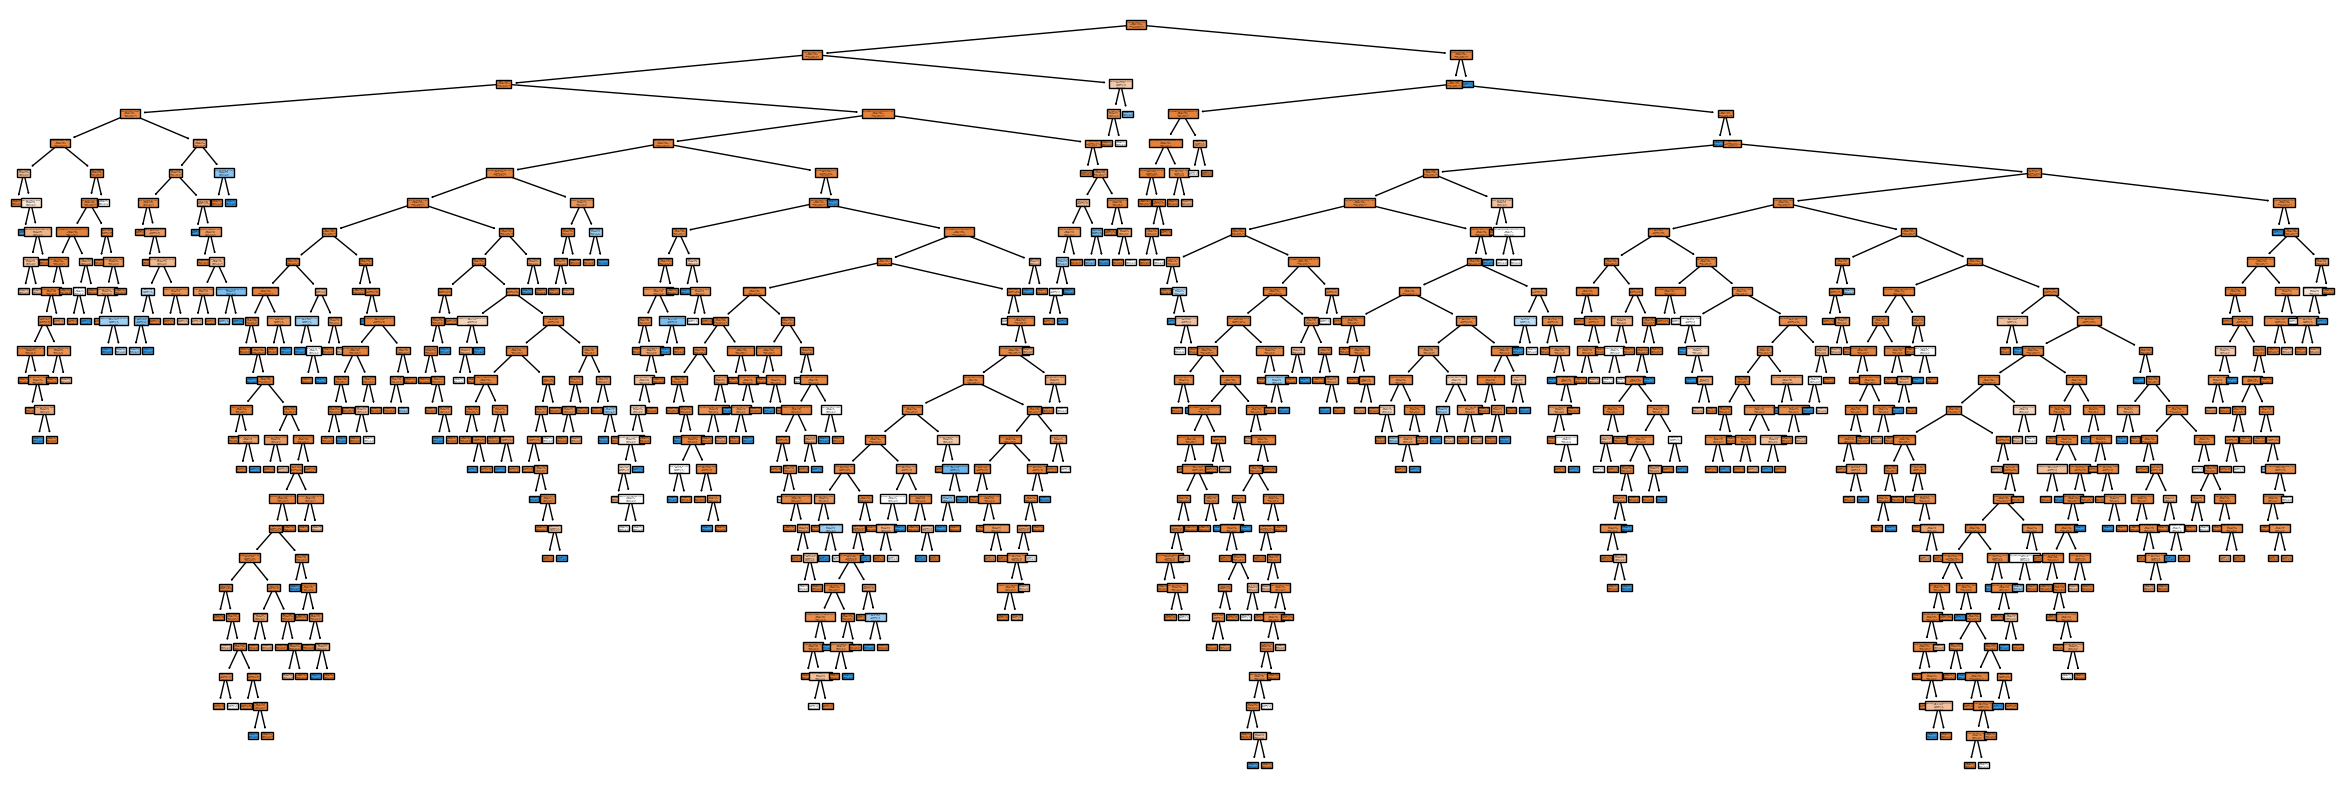

In [33]:
plt.figure(figsize=(30, 10))
plot_tree(clf, filled=True, class_names=['Bons', 'Maus'],
         feature_names=list(x.columns));

In [36]:
# Rodando modelo na base de testes
y_pred = clf.predict(x_test)

# Calculando a acuracia
acc = accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 96.84%


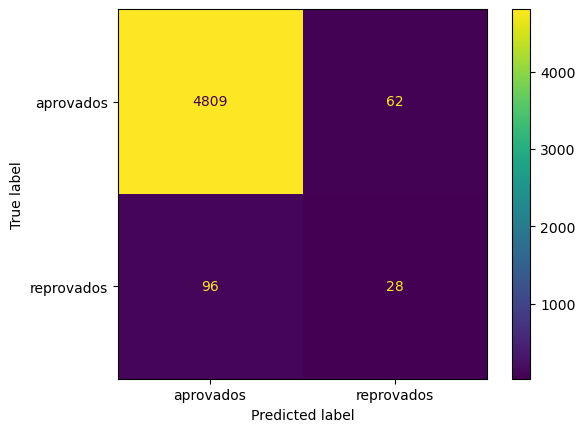

In [40]:
# Matriz de confusão com dados de teste
cm_test = confusion_matrix(y_test, y_pred, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot()


### <span>Resolvendo problemas com overfitting </span>

In [41]:
# Treinar modelo de classificação com profundidade máxima de 10 nós e mínimo de 5 folhas.
clf  = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

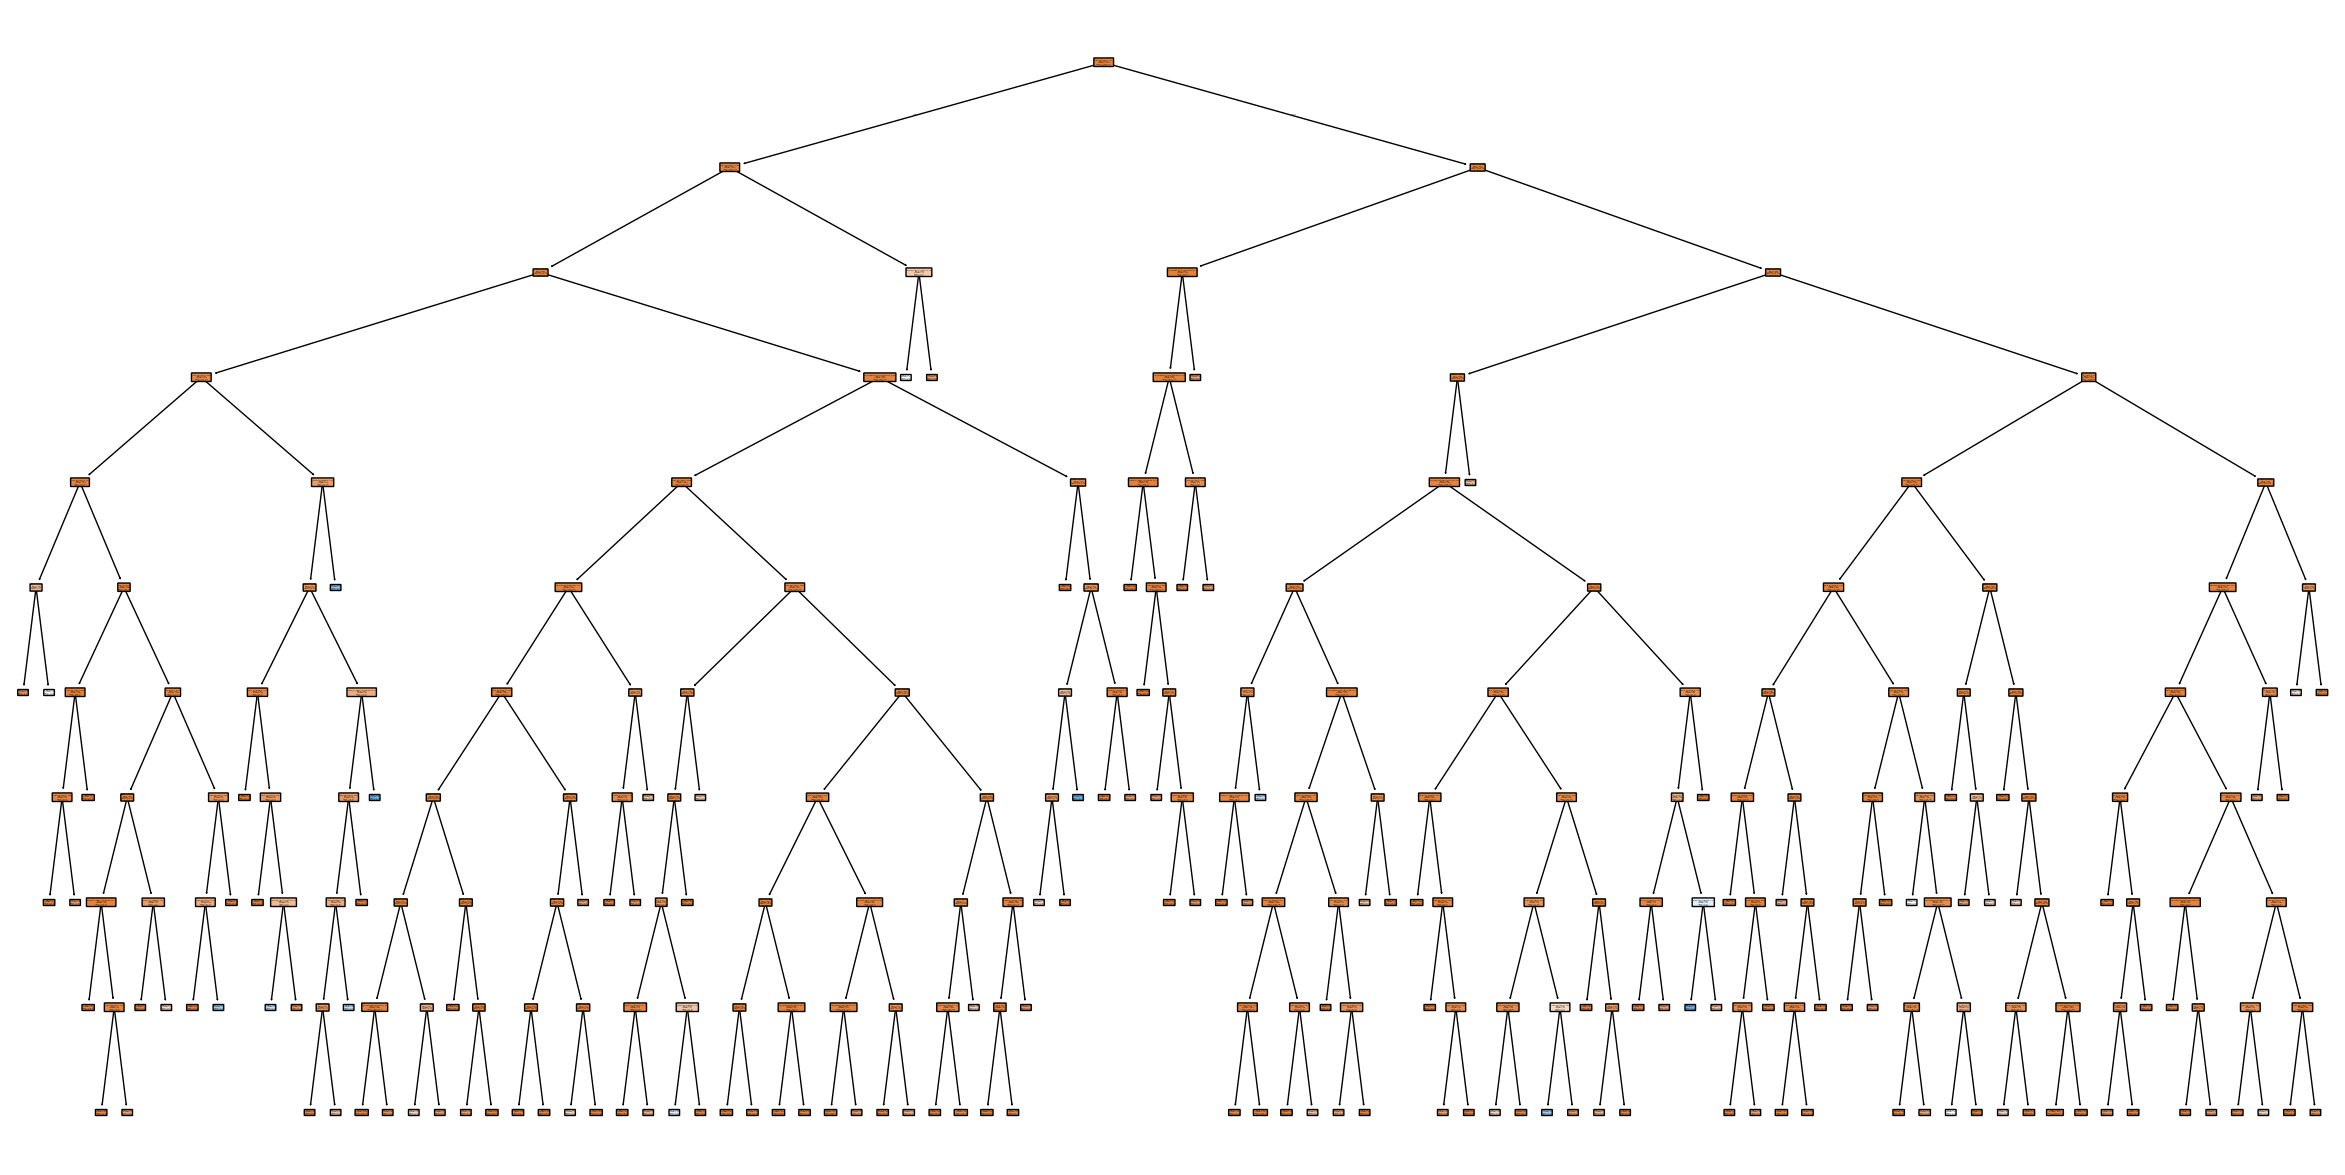

In [43]:
plt.figure(figsize=[30,15])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Bons', 'Maus'],
         feature_names=list(x_train.columns));

In [45]:
# Calculando a acuracia
predict = clf.predict(x_test)

acc = accuracy_score(y_test, predict)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.30%


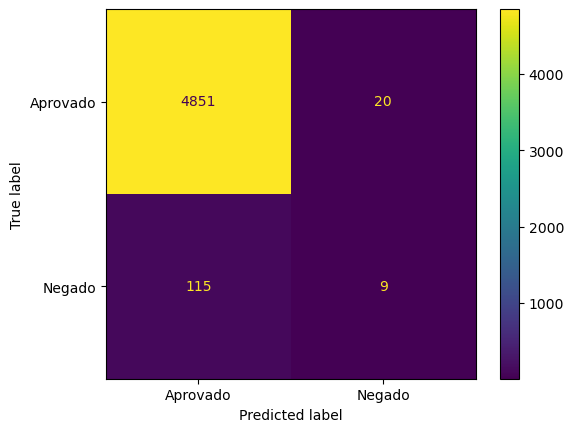

In [47]:
# Matriz de confusão
cm_ = confusion_matrix(y_test, predict, labels=clf.classes_)
MatrizDeConfusao2 = ConfusionMatrixDisplay(confusion_matrix=cm_, display_labels=['Aprovado', 'Negado'])

MatrizDeConfusao2.plot()


## Etapa 5 Crisp-DM: Avaliação dos resultados
A etapa final do CRISP. Neste casp, a nossa avaliação termina com a acurácia. Mas em problemas futuros aprofundaremos mais - a ideia seria avaliar o impacto do uso do modelo no negócio, ou seja, o quanto o resultado financeiro melhora em detrimento da utilização do modelo.

Como um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos acertos | Prejuízo dos erros | total  |
| --------- |:-----------------:|:------------------:| ------:|
| Aprovados | 4.851*5 = 24.225  |    -20*5 = -100    | 24.155 |
| Negados   |    9*100 = 900    | 115*-100 = -11.500 | -10.600|
|  Total    |                   |                    |  13.555|

Estariamos Lucrando, portanto, um valor de 13.555 '*dinheiros*' - o que na prática significa lucro para a instituição.


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor de crédito que toma as decisões com algum nível de automação - tipicamente aprovando automaticamente clientes muito bons, negando automaticamente clientes muito ruins, e enviando os intermediários para análise manual.